# Машинное обучение - Лабораторная работа 1

**Выполнила:**  
Идрисова Лена    

### Импорт библиотек

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis
import gdown
from google.colab import drive

## Advertising

### Считываем набор данных

In [ ]:
url = 'https://drive.google.com/uc?id=12BWJeoxiIIsWgYSyC-vl3aigSnYY95n9'
output = 'Advertising.csv'
gdown.download(url, output, quiet=False)
Advertising = pd.read_csv('/content/Advertising.csv')
Advertising.head()

Downloading...
From: https://drive.google.com/uc?id=12BWJeoxiIIsWgYSyC-vl3aigSnYY95n9
To: /content/Advertising.csv
100%|██████████| 4.21k/4.21k [00:00<00:00, 9.54MB/s]


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* `TV` - затраты на рекламу на телевидении;
* `radio` - затраты на рекламу по радио;
* `newspaper` - затраты на рекламу в газетах;
* `sales` - объем продаж.

### Меры центральной тенденции

In [ ]:
central_trend = pd.DataFrame([{'name': 'TV', 'mean' : Advertising['TV'].mean(), 'median': Advertising['TV'].median(), 'mode': Advertising['TV'].mode()[0]},
                              {'name': 'radio', 'mean' : Advertising['radio'].mean(), 'median': Advertising['radio'].median(), 'mode': Advertising['radio'].mode()[0]},
                              {'name': 'newspaper', 'mean' : Advertising['newspaper'].mean(), 'median': Advertising['newspaper'].median(), 'mode': Advertising['newspaper'].mode()[0]},
                              {'name': 'sales', 'mean' : Advertising['sales'].mean(), 'median': Advertising['sales'].median(), 'mode': Advertising['sales'].mode()[0]}
                              ])
central_trend



,name,mean,median,mode
0,TV,147.0425,149.75,17.2
1,radio,23.2640,22.90,4.1
2,newspaper,30.5540,25.75,8.7
3,sales,14.0225,12.90,9.7


**Выводы:**


*   В среднем рекламный бюджет на
телевидение сильно больше, чем на радио и газеты
*   Значения медиан рекламного бюджета на радио и телевидения достаточно близки к их среднему значению
*   Мода рекламного бюджета на телевидении сильно больше чем на остальных пунктах, значит на радио и газетах данные разнообразнее

### Меры разброса

In [ ]:
scatter = pd.DataFrame ([{'name': 'TV', 'var' : Advertising['TV'].var(), 'std': Advertising['TV'].std(), 'min': Advertising['TV'].min(), 'max': Advertising['TV'].max(), 'IQR': np.quantile(Advertising['TV'], 3/4)-np.quantile(Advertising['TV'], 1/4)},
                        {'name': 'radio', 'var' : Advertising['radio'].var(), 'std': Advertising['radio'].std(), 'min': Advertising['radio'].min(), 'max': Advertising['radio'].max(), 'IQR': np.quantile(Advertising['radio'], 3/4)-np.quantile(Advertising['radio'], 1/4)},
                        {'name': 'newspaper', 'var' : Advertising['newspaper'].var(), 'std': Advertising['newspaper'].std(), 'min': Advertising['newspaper'].min(), 'max': Advertising['newspaper'].max(), 'IQR': np.quantile(Advertising['newspaper'], 3/4)-np.quantile(Advertising['newspaper'], 1/4)},
                        {'name': 'sales', 'var' : Advertising['sales'].var(), 'std': Advertising['sales'].std(), 'min': Advertising['sales'].min(), 'max': Advertising['sales'].max(), 'IQR': np.quantile(Advertising['sales'], 3/4)-np.quantile(Advertising['sales'], 1/4)}
                        ])
scatter

,name,var,std,min,max,IQR
0,TV,7370.949893,85.854236,0.7,296.4,144.450
1,radio,220.427743,14.846809,0.0,49.6,26.550
2,newspaper,474.308326,21.778621,0.3,114.0,32.350
3,sales,27.221853,5.217457,1.6,27.0,7.025


**Выводы:**


*   Рекламный бюджет на
телевидение имеет наибольший разрос
*   Рекламный бюджет на радио может даже где-то отсутвовать
*   Рекламный бюджет на телевидение имеет максимальное среди всех значений

### Параметры формы распределений

In [ ]:
distribution = pd.DataFrame([{'name' : 'TV', 'skew': Advertising['TV'].skew(), 'excess': Advertising['TV'].kurtosis()},
                            {'name' : 'radio', 'skew' : Advertising['radio'].skew(), 'excess' : Advertising['radio'].kurtosis()},
                            {'name' : 'newspaper', 'skew' : Advertising['newspaper'].skew(), 'excess' : Advertising['newspaper'].kurtosis()},
                            {'name' : 'sales', 'skew' : Advertising['sales'].skew(), 'excess' : Advertising['sales'].kurtosis()}])
distribution

,name,skew,excess
0,TV,-0.069853,-1.226495
1,radio,0.094175,-1.260401
2,newspaper,0.894720,0.649502
3,sales,0.407571,-0.408869


**Выводы:**


*   Распределение почти симметрично и имеет более плоские пики, чем нормальное распределение
*   Распределение рекламного бюджета на газеты имеет правостороннюю асимметрию и более заостренным пиком, чем у нормального распределения
*   Распределение продаж имеет правостороннюю ассиметрию и более плоский пик, чем у нормального


### Гистограммы каждого признака и KDE и EDF


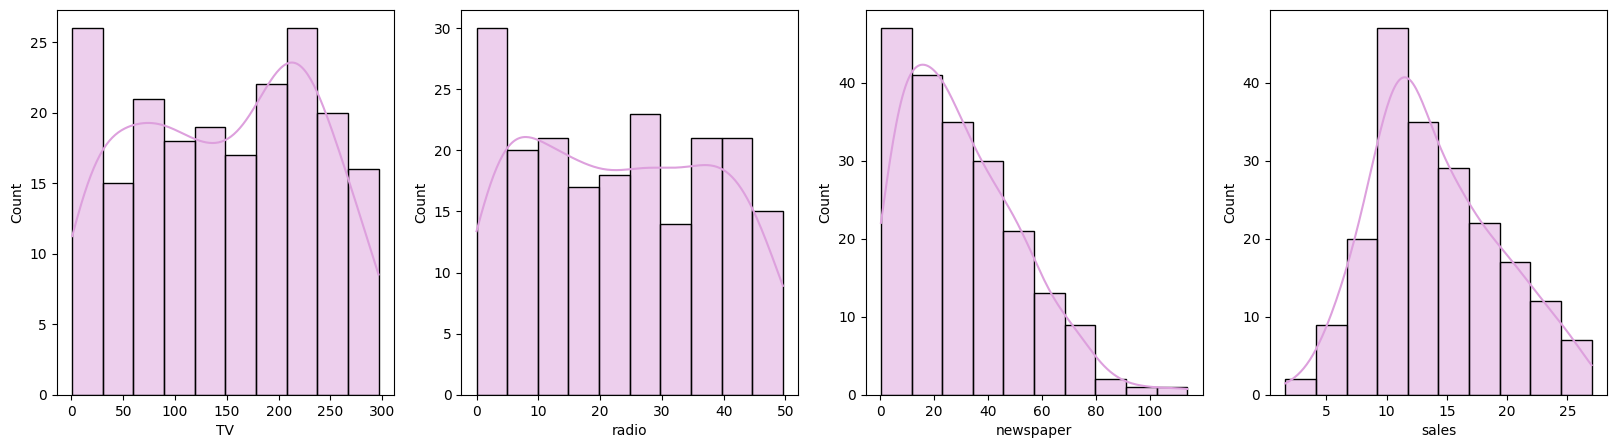

In [ ]:
plt.figure(figsize=(20, 5))
for i, column in enumerate(Advertising.columns):
    plt.subplot(1, 4, i + 1)
    sns.histplot(Advertising[column], kde=True, bins=10, color = 'plum')
    plt.xlabel(f'{column}')

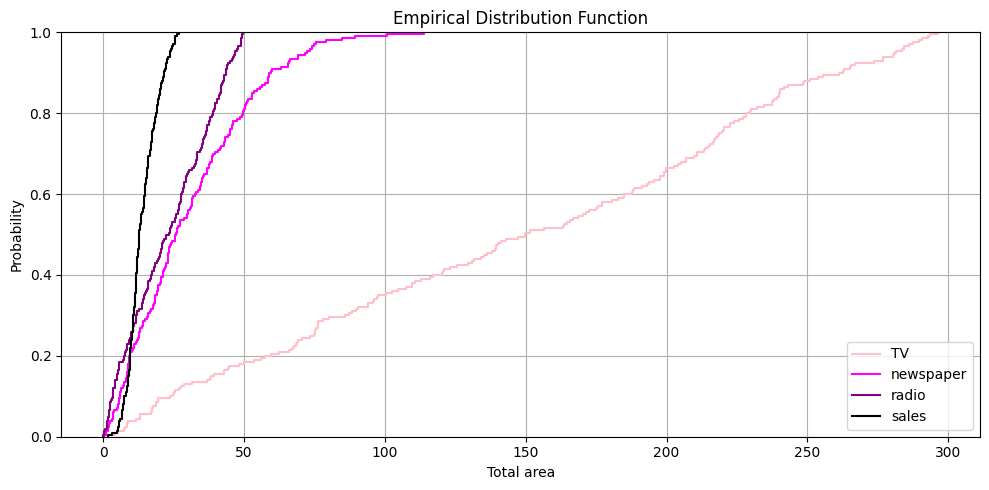

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.ecdfplot(Advertising['TV'], label='TV', color='pink')
sns.ecdfplot(Advertising['newspaper'], label='newspaper', color='magenta')
sns.ecdfplot(Advertising['radio'], label='radio', color='purple')
sns.ecdfplot(Advertising['sales'], label='sales', color='black')
axs.set_title('Empirical Distribution Function')
axs.set_xlabel('Total area')
axs.set_ylabel('Probability')
axs.legend()
axs.grid()

plt.tight_layout()
plt.show()

**Выводы:**


*   Распределение рекламного бюджета на газеты похоже на гамма-распределение
*   Распределение рекламного бюджета на телевидение и радио похоже на равномерное
*   Распределение продаж похоже на распределение Вейбулла

### Матрица корреляций между признаками и тепловая карта

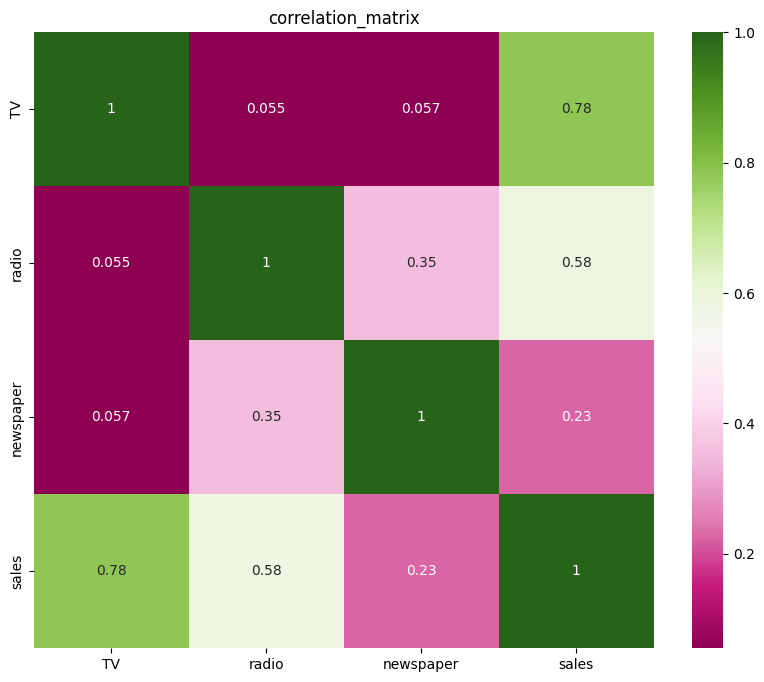

In [ ]:
correlation_matrix = Advertising.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')
plt.title('correlation_matrix')
plt.show()

По тепловой карте видно, что данные о рекламном бюджете на TV, radio, newspaper слабо коррелируют между собой
А sales наоборот зависит от рекламного бюджета, в особенности от TV

### Извлечение новых признаков

Создадим новый признак - общие затраты (TV + radio + newspaper)

In [ ]:
Advertising['total_costs'] = Advertising['TV'] + Advertising['radio'] + Advertising['newspaper']

Advertising.head()

,TV,radio,newspaper,sales,total_costs
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


### Преобразование признаков

In [ ]:
# z-score scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Advertising)

# Преобразуем обратно в DataFrame
Advertising_new = pd.DataFrame(scaled_data, columns=Advertising.columns)

Advertising_new.head()

,TV,radio,newspaper,sales,total_costs
0,0.969852,0.981522,1.778945,1.552053,1.468851
1,-1.197376,1.082808,0.669579,-0.696046,-0.775834
2,-1.516155,1.528463,1.783549,-0.907406,-0.738099
3,0.052050,1.217855,1.286405,0.860330,0.543808
4,0.394182,-0.841614,1.281802,-0.215683,0.529792


Благодаря z-score scaling данные теперь приведен к нулевому среднему и единичному стандартному отклонению

### Отбор признаков и объектов

Для анализа выбросов можно использовать боксплоты

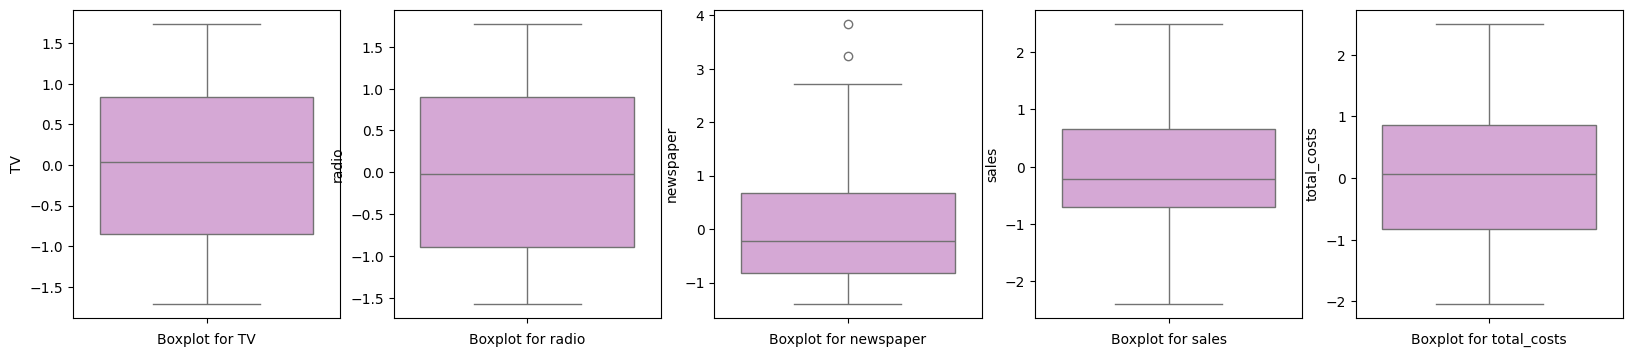

In [ ]:
plt.figure(figsize=(20, 4))
for i, column in enumerate(Advertising_new.columns):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(Advertising_new[column], color = 'plum')
    plt.xlabel(f'Boxplot for {column}')

По боксплотам видно, что выбросы есть у newspaper, удалим их с помощью IQR:

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in Advertising_new.columns:
    Advertising_new = remove_outliers_iqr(Advertising_new, col)

Проверка правильности удаления

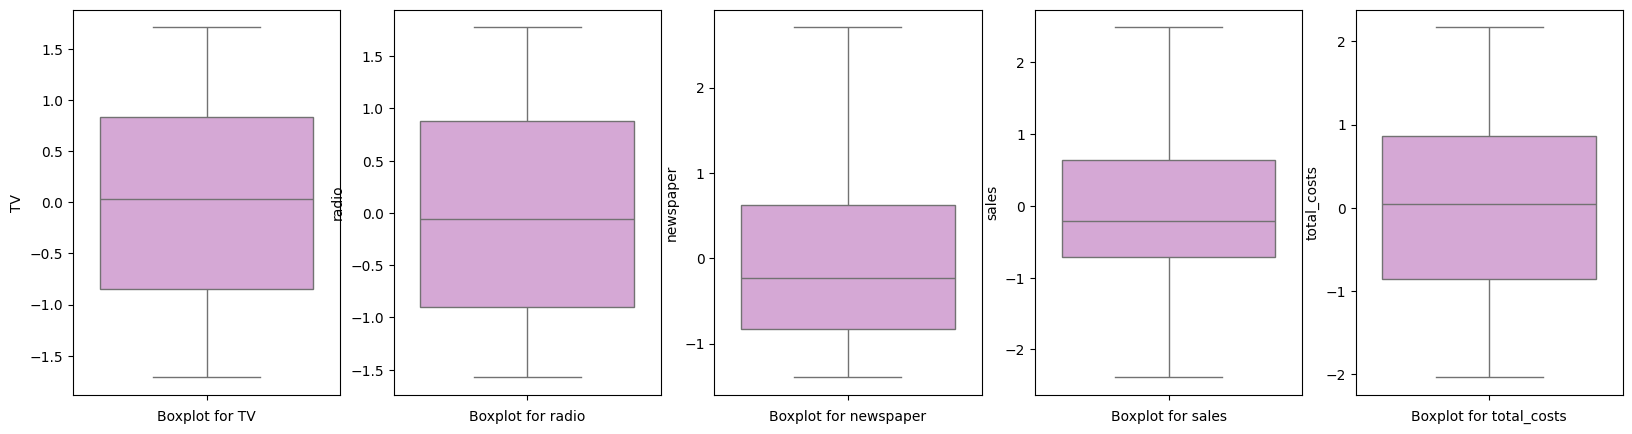

In [ ]:
plt.figure(figsize=(20, 5))
for i, column in enumerate(Advertising_new.columns):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(Advertising_new[column], color = 'plum')
    plt.xlabel(f'Boxplot for {column}')

Анализ аномалий:

In [ ]:
# Функция для обнаружения аномалий с помощью расстояния Махаланобиса
def detect_anomalies_mahalanobis(data):
  data_mahalanobis = data.copy()
  mean = data.mean().values
  cov_matrix = np.cov(data.T)
  inv_cov_matrix = np.linalg.inv(cov_matrix)

  data_mahalanobis['Mahalanobis'] = data.apply(lambda x: mahalanobis(x, mean, inv_cov_matrix), axis=1)

  threshold = data_mahalanobis['Mahalanobis'].quantile(0.95)

  return data_mahalanobis[data_mahalanobis['Mahalanobis'] > threshold]


anomalies = detect_anomalies_mahalanobis(Advertising_new)
Advertising_new = Advertising_new.drop(anomalies.index)

print("Аномалии:")
print(anomalies)
print()
print("Размер матрицы с аномалиями: ", Advertising.shape)
print("Размер матрицы без аномалий: ", Advertising_new.shape)

Аномалии:
           TV     radio  newspaper     sales  total_costs  Mahalanobis
2   -1.516155  1.528463   1.783549 -0.907406    -0.738099     3.119480
5   -1.615408  1.731034   2.045930 -1.310911    -0.735943     4.257832
35   1.677471 -1.294022  -1.015186 -0.234898     1.104440     3.209773
75  -1.519658  1.379911   2.708788 -1.022693    -0.548347     3.805207
126 -1.625918  1.055798   0.922754 -1.426198    -1.116526     3.099457
128  0.855419  1.737786  -1.259154  2.051631     0.772373     3.110007
130 -1.708823  1.103065  -1.005979 -2.386924    -1.637267     5.762789
135 -1.153004  1.602739  -1.015186 -0.465472    -1.046447     2.915718
165  1.021231 -1.341288   2.497042 -0.407828     1.313599     3.933608
178  1.513995 -1.415564  -0.315502 -0.427043     1.097971     3.121331

Размер матрицы с аномалиями:  (200, 5)
Размер матрицы без аномалий:  (188, 5)


Удалим сильно коррелирующие признаки:

In [ ]:
def detect_highly_correlated_features(data, threshold=0.8):
    corr_matrix = data.corr()

    # Создаем матрицу верхнего треугольника без диагонали
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    return [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

highly_correlated = detect_highly_correlated_features(Advertising_new)
Advertising_new =Advertising_new.drop(columns=highly_correlated)


print(Advertising_new.corr())
print("Удаленные признаки:", highly_correlated)
print("Размер матрицы до очистки:",Advertising.shape)
print("Размер матрицы после очистки:",Advertising_new.shape)


                 TV     radio  newspaper     sales
TV         1.000000  0.154630   0.117635  0.791454
radio      0.154630  1.000000   0.368070  0.665608
newspaper  0.117635  0.368070   1.000000  0.305464
sales      0.791454  0.665608   0.305464  1.000000
Удаленные признаки: ['total_costs']
Размер матрицы до очистки: (200, 5)
Размер матрицы после очистки: (188, 4)


Обновленные данные

In [ ]:
Advertising_new.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
6,-1.045577,0.643905,-0.324708,-0.427043


In [ ]:
Advertising_new.to_csv('Advertising_new.csv', index=False)

## Heart

### Считываем набор данных

In [ ]:
url = 'https://drive.google.com/uc?id=1ch4OtdLsO3tPhFc7m6EWsZO8we6E02vx'
output = 'heart.csv'
gdown.download(url, output, quiet=False)
Heart = pd.read_csv('/content/heart.csv')
Heart.head()

Downloading...
From: https://drive.google.com/uc?id=1ch4OtdLsO3tPhFc7m6EWsZO8we6E02vx
To: /content/heart.csv
100%|██████████| 11.3k/11.3k [00:00<00:00, 22.7MB/s]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* **age** - возраст

* **sex** - пол

* **cp** - chest pain - тип боли в груди (4 значения)

* **trestbps** - resting blood pressure - давление в состоянии покоя

* **chol** - уровень холестерина в крови, в mg/dl

* **fbs** - fasting blood sugar - уровень сахара в крови, > 120 mg/dl

* **restecg** (resting electrocardiographic results) - результаты покоящей электрокардиограммы (значения 0, 1, 2)

* **thalach** - максимальный пульс

* **exang** (exercise induced angina) - наличие ангины, вызванной физическими нагрузками

* **oldpeak** - пиковые значения в электрокардиограмме при физической
нагрузке по сравнению с состоянием покоя

* **slope** - наклон пикового значения в электрокардиограмме при физической нагрузке по сравнению с состоянием покоя

* **ca** - количество крупных окрашенных сосудов (от 0 до 3) при флурозопии

* **thal** - 3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект

* **target** - 0 обозначает отсутствие заболевания сердца, 1 обозначает наличие заболевания сердца

### Меры центральной тенденции

In [ ]:
central_trend = pd.DataFrame([{'name': 'age','mean': Heart['age'].mean(), 'median': Heart['age'].median(), 'mode': Heart['age'].mode()[0]},
                              {'name': 'sex','mean': Heart['sex'].mean(), 'median': Heart['sex'].median(), 'mode': Heart['sex'].mode()[0]},
                              {'name': 'cp','mean': Heart['cp'].mean(), 'median': Heart['cp'].median(), 'mode': Heart['cp'].mode()[0]},
                              {'name': 'trestbps','mean': Heart['trestbps'].mean(), 'median': Heart['trestbps'].median(), 'mode': Heart['trestbps'].mode()[0]},
                              {'name': 'fbs','mean': Heart['fbs'].mean(), 'median': Heart['fbs'].median(), 'mode': Heart['fbs'].mode()[0]},
                              {'name': 'chol','mean': Heart['chol'].mean(), 'median': Heart['chol'].median(), 'mode': Heart['chol'].mode()[0]},
                              {'name': 'restecg','mean': Heart['restecg'].mean(), 'median': Heart['restecg'].median(), 'mode': Heart['restecg'].mode()[0]},
                              {'name': 'thalach','mean': Heart['thalach'].mean(), 'median': Heart['thalach'].median(), 'mode': Heart['thalach'].mode()[0]},
                              {'name': 'exang','mean': Heart['exang'].mean(), 'median': Heart['exang'].median(), 'mode': Heart['exang'].mode()[0]},
                              {'name': 'oldpeak','mean': Heart['oldpeak'].mean(), 'median': Heart['oldpeak'].median(), 'mode': Heart['oldpeak'].mode()[0]},
                              {'name': 'slope','mean': Heart['slope'].mean(), 'median': Heart['slope'].median(), 'mode': Heart['slope'].mode()[0]},
                              {'name': 'ca','mean': Heart['ca'].mean(), 'median': Heart['ca'].median(), 'mode': Heart['ca'].mode()[0]},
                              {'name': 'thal','mean': Heart['thal'].mean(), 'median': Heart['thal'].median(), 'mode': Heart['thal'].mode()[0]},
                              {'name': 'target','mean': Heart['target'].mean(), 'median': Heart['target'].median(), 'mode': Heart['target'].mode()[0]}
                              ])
central_trend



,name,mean,median,mode
0,age,54.366337,55.0,58.0
1,sex,0.683168,1.0,1.0
2,cp,0.966997,1.0,0.0
3,trestbps,131.623762,130.0,120.0
4,fbs,0.148515,0.0,0.0
5,chol,246.264026,240.0,197.0
6,restecg,0.528053,1.0,1.0
7,thalach,149.646865,153.0,162.0
8,exang,0.326733,0.0,0.0
9,oldpeak,1.039604,0.8,0.0


Вывод:

*    По среднему значению таргета видно, что в датасете немного больше пациентов с заболеваниями сердца, чем без них

### Меры разброса

In [ ]:
scatter = pd.DataFrame([{'name': 'age','var': Heart['age'].var(), 'std': Heart['age'].std(),'min': Heart['age'].min(),'max': Heart['age'].max(),'IQR': np.quantile(Heart['age'], 3/4)-np.quantile(Heart['age'], 1/4)},
                        {'name': 'sex','var': Heart['sex'].var(), 'std': Heart['sex'].std(),'min': Heart['sex'].min(),'max': Heart['sex'].max(),'IQR': np.quantile(Heart['sex'], 3/4)-np.quantile(Heart['sex'], 1/4)},
                        {'name': 'cp','var': Heart['cp'].var(), 'std': Heart['cp'].std(),'min': Heart['cp'].min(),'max': Heart['cp'].max(),'IQR': np.quantile(Heart['cp'], 3/4)-np.quantile(Heart['cp'], 1/4)},
                        {'name': 'trestbps','var': Heart['trestbps'].var(), 'std': Heart['trestbps'].std(),'min': Heart['trestbps'].min(),'max': Heart['trestbps'].max(),'IQR': np.quantile(Heart['trestbps'], 3/4)-np.quantile(Heart['trestbps'], 1/4)},
                        {'name': 'fbs','var': Heart['fbs'].var(), 'std': Heart['fbs'].std(),'min': Heart['fbs'].min(),'max': Heart['fbs'].max(),'IQR': np.quantile(Heart['fbs'], 3/4)-np.quantile(Heart['fbs'], 1/4)},
                        {'name': 'chol','var': Heart['chol'].var(), 'std': Heart['chol'].std(),'min': Heart['chol'].min(),'max': Heart['chol'].max(),'IQR': np.quantile(Heart['chol'], 3/4)-np.quantile(Heart['chol'], 1/4)},
                        {'name': 'restecg','var': Heart['restecg'].var(), 'std': Heart['restecg'].std(),'min': Heart['restecg'].min(),'max': Heart['restecg'].max(),'IQR': np.quantile(Heart['restecg'], 3/4)-np.quantile(Heart['restecg'], 1/4)},
                        {'name': 'thalach','var': Heart['thalach'].var(), 'std': Heart['thalach'].std(),'min': Heart['thalach'].min(),'max': Heart['thalach'].max(),'IQR': np.quantile(Heart['thalach'], 3/4)-np.quantile(Heart['thalach'], 1/4)},
                        {'name': 'exang','var': Heart['exang'].var(), 'std': Heart['exang'].std(),'min': Heart['exang'].min(),'max': Heart['exang'].max(),'IQR': np.quantile(Heart['exang'], 3/4)-np.quantile(Heart['exang'], 1/4)},
                        {'name': 'oldpeak','var': Heart['oldpeak'].var(), 'std': Heart['oldpeak'].std(),'min': Heart['oldpeak'].min(),'max': Heart['oldpeak'].max(),'IQR': np.quantile(Heart['oldpeak'], 3/4)-np.quantile(Heart['oldpeak'], 1/4)},
                        {'name': 'slope','var': Heart['slope'].var(), 'std': Heart['slope'].std(),'min': Heart['slope'].min(),'max': Heart['slope'].max(),'IQR': np.quantile(Heart['slope'], 3/4)-np.quantile(Heart['slope'], 1/4)},
                        {'name': 'ca','var': Heart['ca'].var(), 'std': Heart['ca'].std(),'min': Heart['ca'].min(),'max': Heart['ca'].max(),'IQR': np.quantile(Heart['ca'], 3/4)-np.quantile(Heart['ca'], 1/4)},
                        {'name': 'thal','var': Heart['thal'].var(), 'std': Heart['thal'].std(),'min': Heart['thal'].min(),'max': Heart['thal'].max(),'IQR': np.quantile(Heart['thal'], 3/4)-np.quantile(Heart['thal'], 1/4)},
                        {'name': 'target','var': Heart['target'].var(), 'std': Heart['target'].std(),'min': Heart['target'].min(),'max': Heart['target'].max(),'IQR': np.quantile(Heart['target'], 3/4)-np.quantile(Heart['target'], 1/4)}
                      ])

scatter

,name,var,std,min,max,IQR
0,age,82.484558,9.082101,29.0,77.0,13.5
1,sex,0.217166,0.466011,0.0,1.0,1.0
2,cp,1.065132,1.032052,0.0,3.0,2.0
3,trestbps,307.586453,17.538143,94.0,200.0,20.0
4,fbs,0.126877,0.356198,0.0,1.0,0.0
5,chol,2686.426748,51.830751,126.0,564.0,63.5
6,restecg,0.276528,0.525860,0.0,2.0,1.0
7,thalach,524.646406,22.905161,71.0,202.0,32.5
8,exang,0.220707,0.469794,0.0,1.0,1.0
9,oldpeak,1.348095,1.161075,0.0,6.2,1.6


Вывод:

*    Значение диспресии и среднеквадратического отклонения таргета близки к максимально возможным для бинарных переменных

### Параметры формы распределений

In [ ]:
distribution = pd.DataFrame([{'name': 'age','skew': Heart['age'].skew(), 'excess': Heart['age'].kurtosis()},
                              {'name': 'sex','skew': Heart['sex'].skew(), 'excess': Heart['sex'].kurtosis()},
                              {'name': 'cp','skew': Heart['cp'].skew(), 'excess': Heart['cp'].kurtosis()},
                              {'name': 'trestbps','skew': Heart['trestbps'].skew(), 'excess': Heart['trestbps'].kurtosis()},
                              {'name': 'fbs','skew': Heart['fbs'].skew(), 'excess': Heart['fbs'].kurtosis()},
                              {'name': 'chol','skew': Heart['chol'].skew(), 'excess': Heart['chol'].kurtosis()},
                              {'name': 'restecg','skew': Heart['restecg'].skew(), 'excess': Heart['restecg'].kurtosis()},
                              {'name': 'thalach','skew': Heart['thalach'].skew(), 'excess': Heart['thalach'].kurtosis()},
                              {'name': 'exang','skew': Heart['exang'].skew(), 'excess': Heart['exang'].kurtosis()},
                              {'name': 'oldpeak','skew': Heart['oldpeak'].skew(), 'excess': Heart['oldpeak'].kurtosis()},
                              {'name': 'slope','skew': Heart['slope'].skew(), 'excess': Heart['slope'].kurtosis()},
                              {'name': 'ca','skew': Heart['ca'].skew(), 'excess': Heart['ca'].kurtosis()},
                              {'name': 'thal','skew': Heart['thal'].skew(), 'excess': Heart['thal'].kurtosis()},
                              {'name': 'target','skew': Heart['target'].skew(), 'excess': Heart['target'].kurtosis()}
                            ])
distribution

,name,skew,excess
0,age,-0.202463,-0.542167
1,sex,-0.791335,-1.382961
2,cp,0.484732,-1.193071
3,trestbps,0.713768,0.929054
4,fbs,1.986652,1.959678
5,chol,1.143401,4.505423
6,restecg,0.162522,-1.362673
7,thalach,-0.537410,-0.061970
8,exang,0.742532,-1.458317
9,oldpeak,1.269720,1.575813


Вывод:

*    Распределение таргета имеет левостороннюю ассиметрию и более сглаженный пик, чем у нормального

### Гистограммы каждого признака и KDE

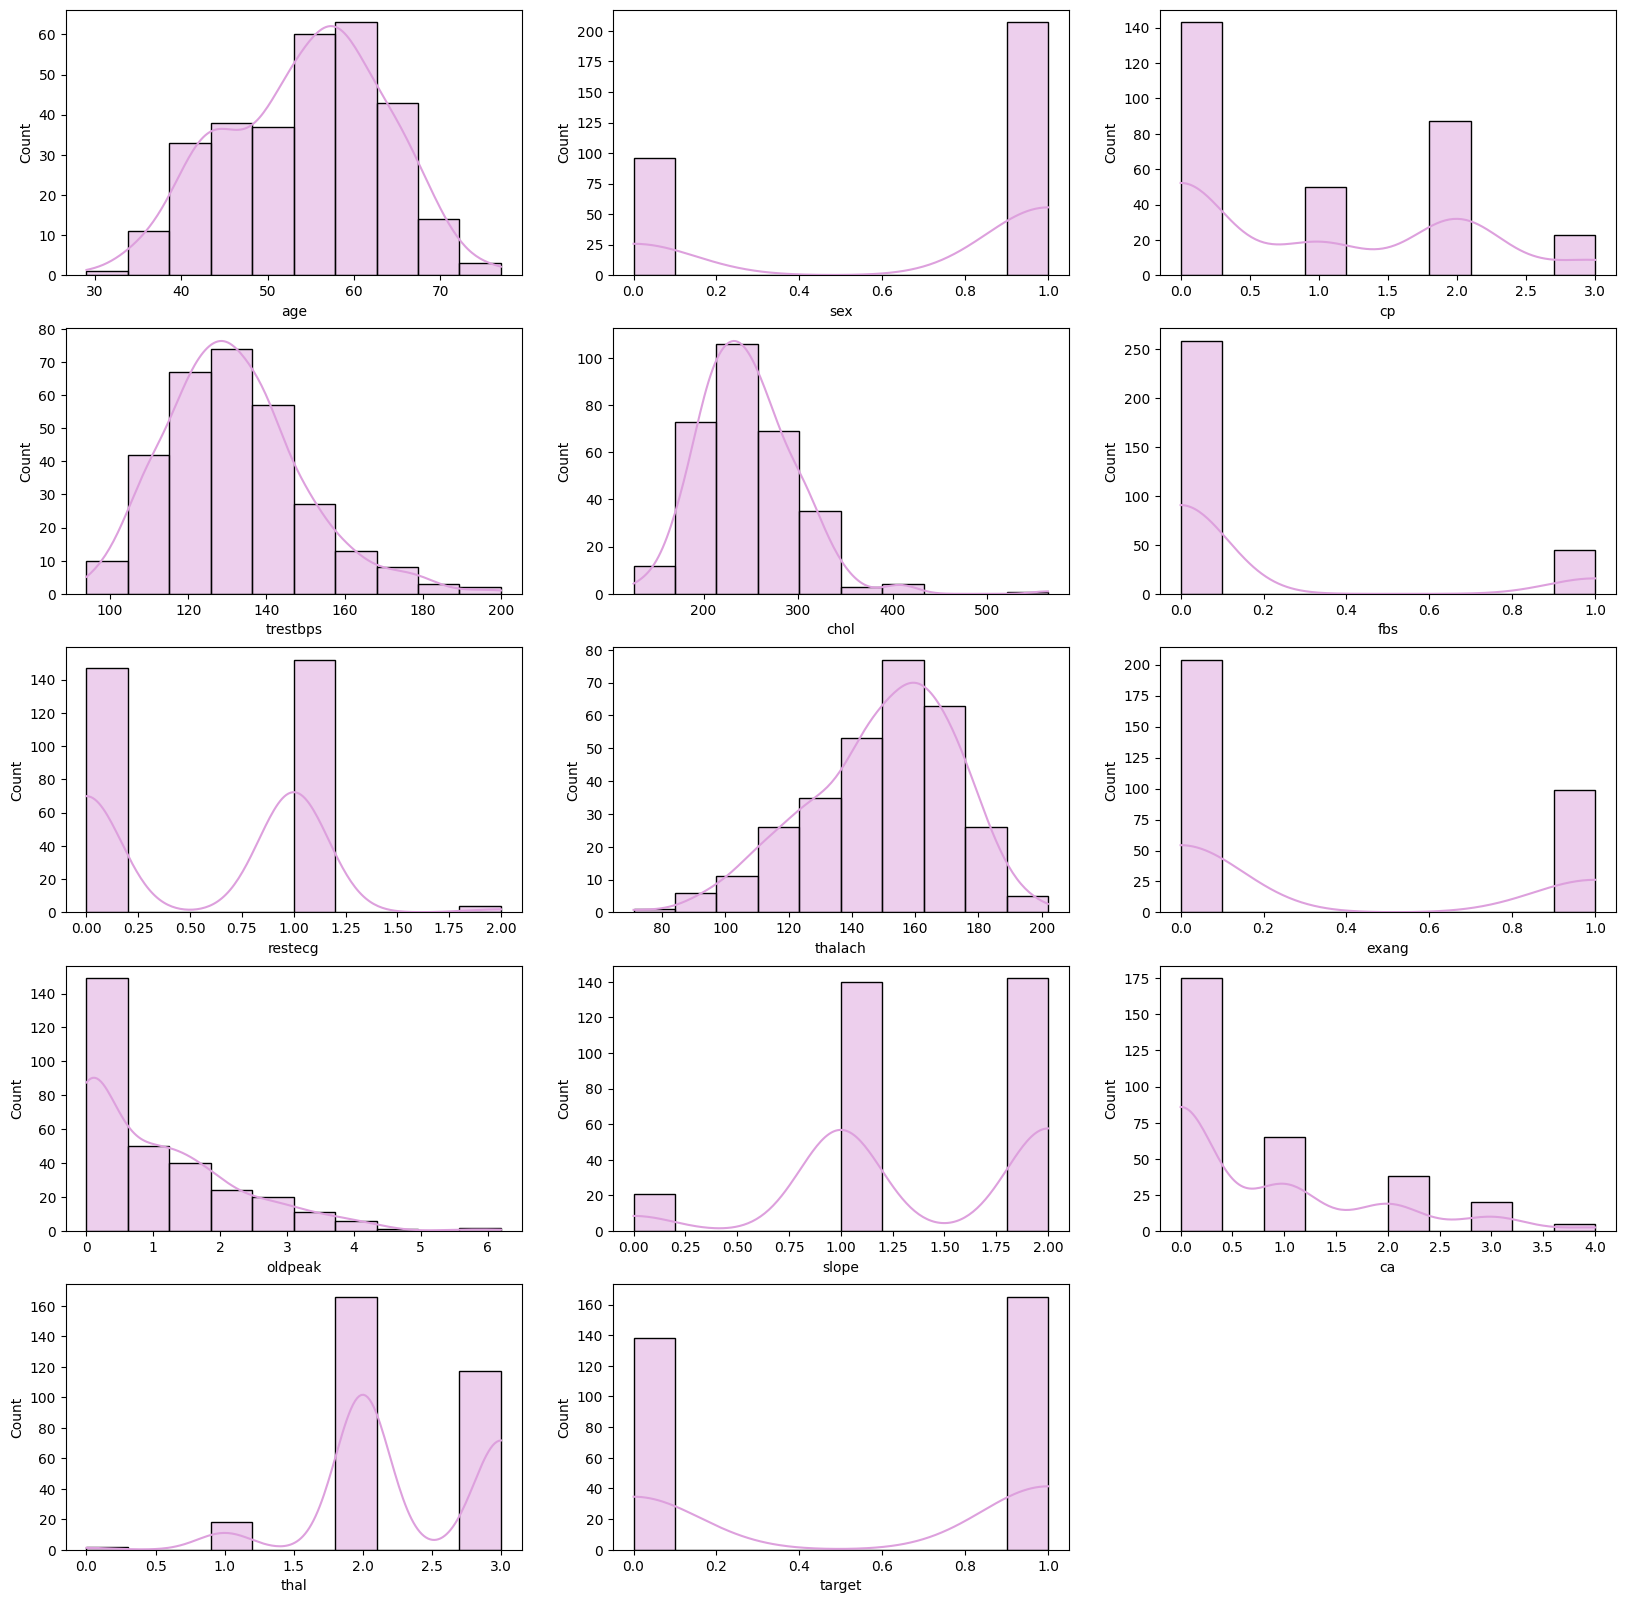

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(Heart.columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(Heart[column], kde=True, bins=10, color = 'plum')
    plt.xlabel(f'{column}')

 ### ECDF

Выводы:

*    Распределение возраста, давления в состоянии покоя и максимального пульса близки к нормальному
*    Распределение уровеня холестерина в крови и пиковых значений в электрокардиограмме при физической нагрузке по сравнению с состоянием покоя похожи на логарифмические
*    Таргет имеет биномиальное распределение




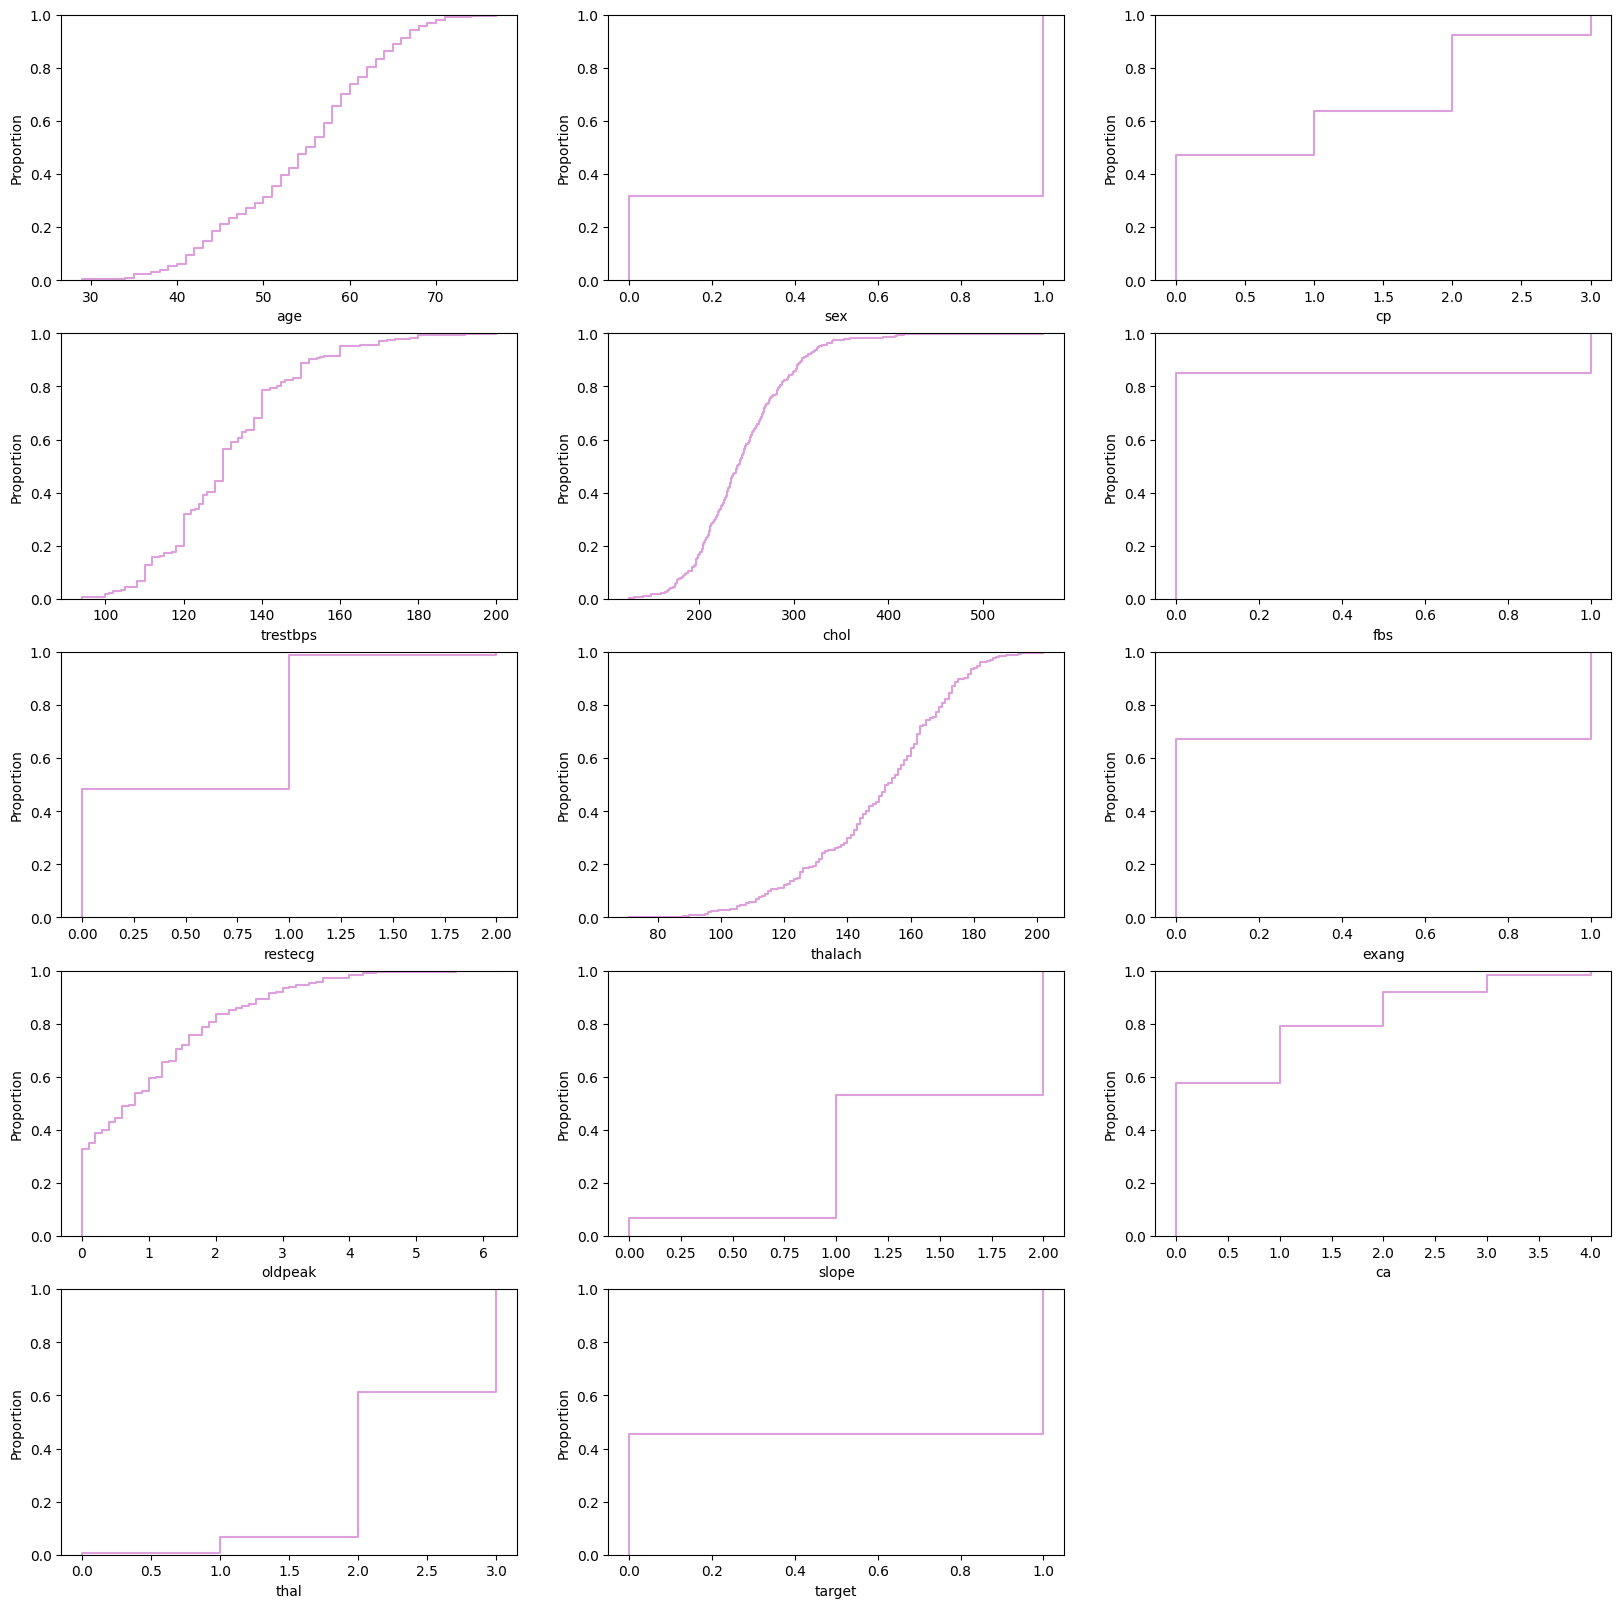

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(Heart.columns):
    plt.subplot(5, 3, i + 1)
    sns.ecdfplot(Heart[column], color = 'plum')
    plt.xlabel(f'{column}')

### Матрица корреляций между признаками и тепловая карта

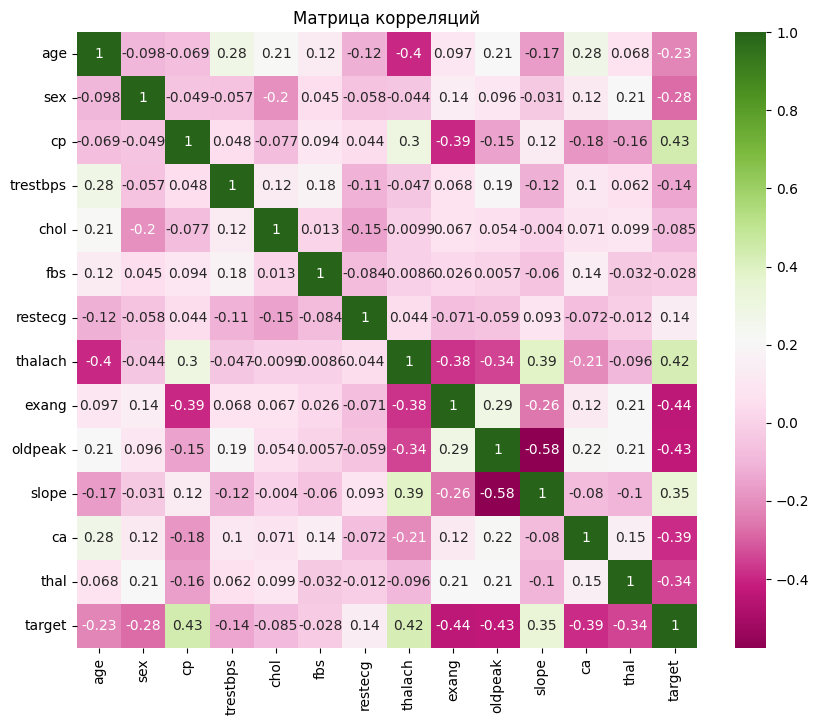

In [ ]:
correlation_matrix = Heart.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG")
plt.title("Матрица корреляций")
plt.show()


Выводы:

*     Наклон пикового значения в электрокардиограмме при физической нагрузке по сравнению с состоянием покоя и максимальный пульс коррелируют между собой сильнее остальных признаков
*    Таргет больше всего зависит от типа боли в груди



### Извлечение новых признаков

Создадим новый бинарный признак - уровень давления в крови преобразуем в бинарный признак

In [ ]:
Heart["high_fbs"] = (Heart["trestbps"] > 130).astype(int)
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,high_fbs
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


### Преобразование признаков

Так как датасет содержит категориальные признаки, для z-score scaling их нужно преобразовать с помощью One-hot encoding

In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang',  'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca','slope', 'high_fbs']

encoded_features = pd.get_dummies(Heart[categorical_features], columns=Heart[categorical_features].columns, dtype=int)
data_heart_encoded = pd.concat([Heart[numerical_features], encoded_features], axis=1)
data_heart_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,slope,high_fbs,sex_0,sex_1,...,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,0,1,0,1,...,1,1,0,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,41,130,204,172,1.4,0,2,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,56,120,236,178,0.8,0,2,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,57,120,354,163,0.6,0,2,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
# Применение z-score scaling
scaler = StandardScaler()
data_heart_encoded[numerical_features] = scaler.fit_transform(data_heart_encoded[numerical_features])
data_heart_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,slope,high_fbs,sex_0,sex_1,...,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-0.714429,-2.274579,1.138180,0,1,...,1,1,0,0,1,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-0.714429,-2.274579,-0.878595,0,1,...,0,0,1,0,1,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-0.714429,0.976352,-0.878595,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,-0.714429,0.976352,-0.878595,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-0.714429,0.976352,-0.878595,1,0,...,0,0,1,0,0,1,0,0,1,0


### Отбор признаков и объектов

Для анализа выбросов используем боксплоты

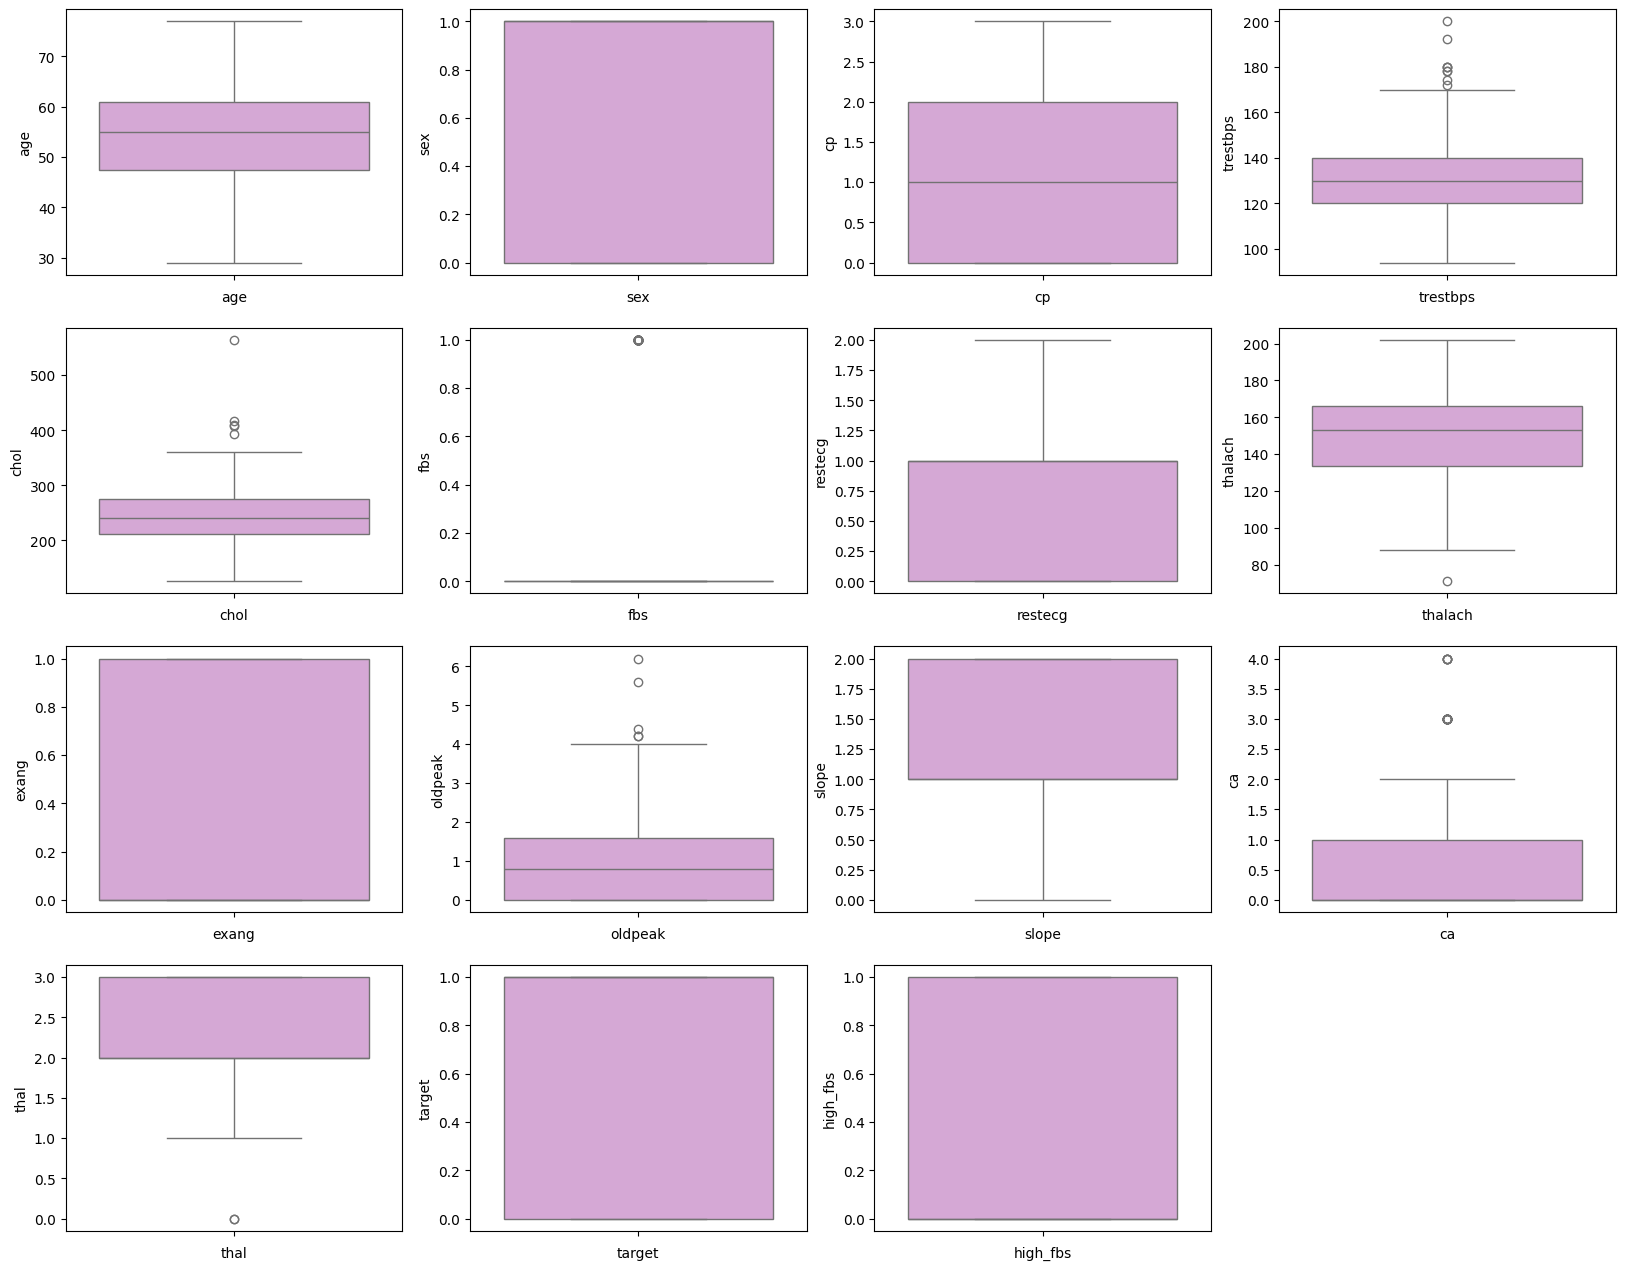

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(Heart.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(Heart[column], color = 'plum')
    plt.xlabel(f'{column}')

По боксплотам видно, что выбросы есть у trestbps, chol, fbs, thalach, oldpeak, ca и thal, удалим их с помощью IQR:

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for col in Heart_new.columns:
    Heart_new = remove_outliers_iqr(Heart_new, col)

Проверка правильности удаления

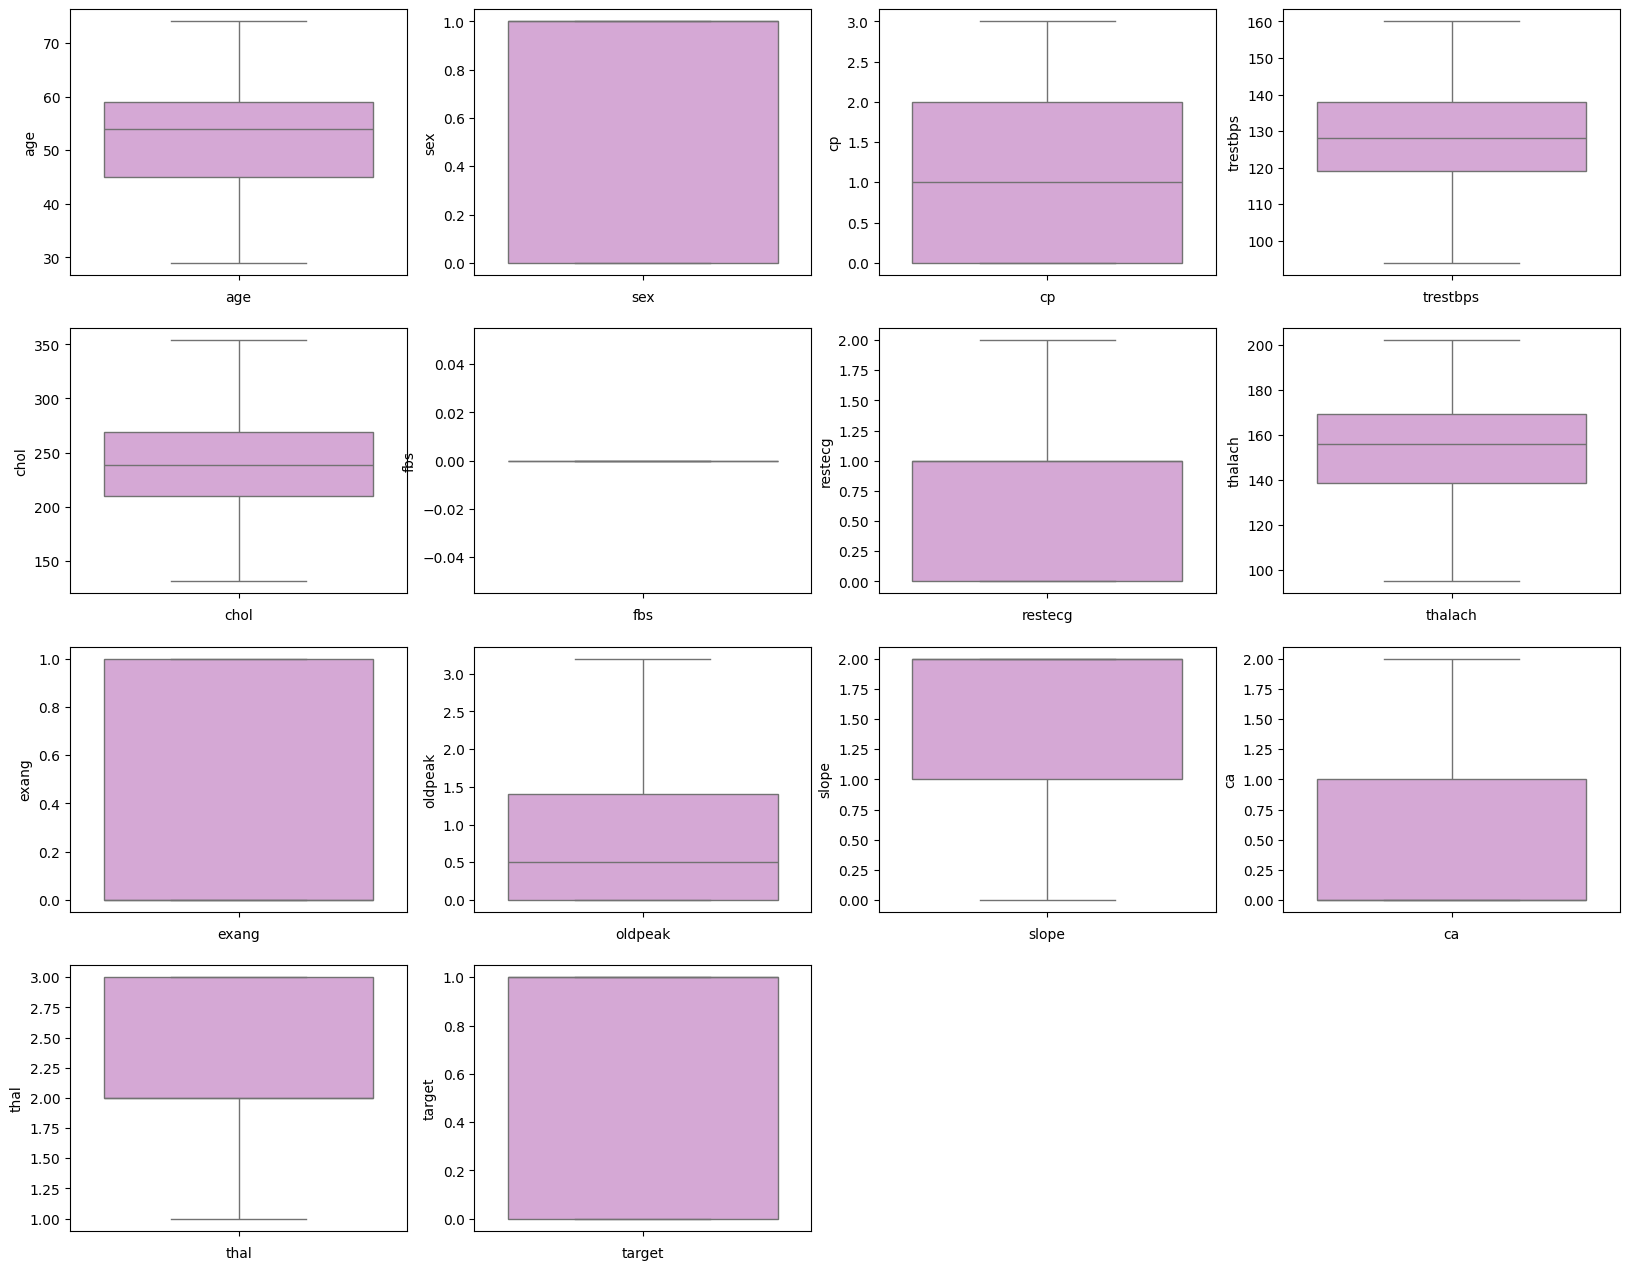

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(Heart_new.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(Heart_new[column], color = 'plum')
    plt.xlabel(f'{column}')

Анализ аномалий:

In [ ]:
# Функция для обнаружения аномалий с помощью расстояния Махаланобиса
def detect_anomalies_mahalanobis(data):
    data_mahalanobis = data.copy()
    mean = data.mean().values
    cov_matrix = np.cov(data.T)
    inv_cov_matrix = np.linalg.pinv(cov_matrix)

    data_mahalanobis['Mahalanobis'] = data.apply(lambda x: mahalanobis(x, mean, inv_cov_matrix), axis=1)

    threshold = data_mahalanobis['Mahalanobis'].quantile(0.95)

    return data_mahalanobis[data_mahalanobis['Mahalanobis'] > threshold]

anomalies = detect_anomalies_mahalanobis(Heart_new)
Heart_new = Heart_new.drop(anomalies.index)

print("Аномалии:")
print(anomalies)
print()
print("Размер матрицы с аномалиями: ", Heart.shape)
print("Размер матрицы без аномалий: ", Heart_new.shape)

Аномалии:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
5     57    1   0       140   192    0        1      148      0      0.4   
17    66    0   3       150   226    0        1      114      0      2.6   
24    40    1   3       140   199    0        1      178      1      1.4   
62    52    1   3       118   186    0        0      190      0      0.0   
63    41    1   1       135   203    0        1      132      0      0.0   
95    53    1   0       142   226    0        0      111      1      0.0   
138   57    1   0       110   201    0        1      126      1      1.5   
139   64    1   0       128   263    0        1      105      1      0.2   
171   48    1   1       110   229    0        1      168      0      1.0   
194   60    1   2       140   185    0        0      155      0      3.0   

     slope  ca  thal  target  Mahalanobis  
5        1   0     1       1     4.630660  
17       0   0     2       1     4.799393  
24       2   0     3 

Удалим сильно коррелирующие признаки:

In [ ]:
def detect_highly_correlated_features(data, threshold=0.75):
    corr_matrix = data.corr()

    # Создаем матрицу верхнего треугольника без диагонали
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    return [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

highly_correlated = detect_highly_correlated_features(Heart_new)
Heart_new = Heart_new.drop(columns=highly_correlated)

print("Удаленные признаки:", highly_correlated)
print("Размер матрицы до очистки:", Heart.shape)
print("Размер матрицы после очистки:", Heart_new.shape)

Удаленные признаки: []
Размер матрицы до очистки: (303, 15)
Размер матрицы после очистки: (189, 14)


In [ ]:
Heart_new.to_csv('Heart_new.csv', index=False)

## Вывод



В ходе данной лабораторной работы мы рассмотрели 2 датасета, один c данными из книги ISLR, где рассматриваются продажи товара в зависимости от рекламного бюджета на ТВ, радио и в газетах, и другой с информацией о физическом тестировании пациентов.   

Были проведены статистический анализ, исследование признаков на возможность извлечения новых, z-scaling преобразование.

С помощью различных способов удалены выбросы, аномалии и сильно коррелирующие признаки.